
```
"""
HIGH DIMENSION ANALYSIS
Programing excercise: 04
Name: Tieu Khoi Mai
Student Code: 1711159
"""
```

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/My Drive/Xulydachieu/Lab04")
print(os.getcwd())

/content/drive/My Drive/Xulydachieu/Lab04


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1. Tải file fashion mnist. Dùng hàm convert để chuyển file gốc thành dataframe


*   file train-images-idx3-ubyte: 60000 tấm ảnh 28x28 chuyển thành shape 6000x784 và file "train-labels-idx1-ubyte" là 60000 dòng đưa thành cột label đầu tiên -> mnist_train.csv shape (60000,785)
*   file t10k-images-idx3-ubyte: 60000 tấm ảnh 28x28 chuyển thành shape 1000x784 và file "t10k-labels-idx1-ubyte" là 10000 dòng đưa thành cột label đầu tiên -> mnist_test.csv shape (10000,785)



In [ ]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("train-images-idx3-ubyte", "train-labels-idx1-ubyte",
        "mnist_train.csv", 60000)
convert("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte",
        "mnist_test.csv", 10000)

#2. Tạo tên cột format label + tên pixel 

In [5]:
feat_cols = [ 'pix'+ str(i) for i in range(28 * 28 ) ]

In [6]:
cols = ['label'] + feat_cols

In [7]:
df_train = pd.read_csv('mnist_train.csv', names = cols)
df_test = pd.read_csv('mnist_test.csv', names = cols)

#3. Vì mục tiêu của bài toán là visualize dữ liệu thay vì train model nên ta gộp data lại thành một tập dữ liệu gồm 70000 dòng thay vì chia ra tập train và tập test

In [8]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(70000, 785)

In [9]:
df.head()

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,pix11,pix12,pix13,pix14,pix15,pix16,pix17,pix18,pix19,pix20,pix21,pix22,pix23,pix24,pix25,pix26,pix27,pix28,pix29,pix30,pix31,pix32,pix33,pix34,pix35,pix36,pix37,pix38,...,pix744,pix745,pix746,pix747,pix748,pix749,pix750,pix751,pix752,pix753,pix754,pix755,pix756,pix757,pix758,pix759,pix760,pix761,pix762,pix763,pix764,pix765,pix766,pix767,pix768,pix769,pix770,pix771,pix772,pix773,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


#4. Plot ngẫu nhiên 15 ảnh trong bộ dữ liệu

<Figure size 432x288 with 0 Axes>

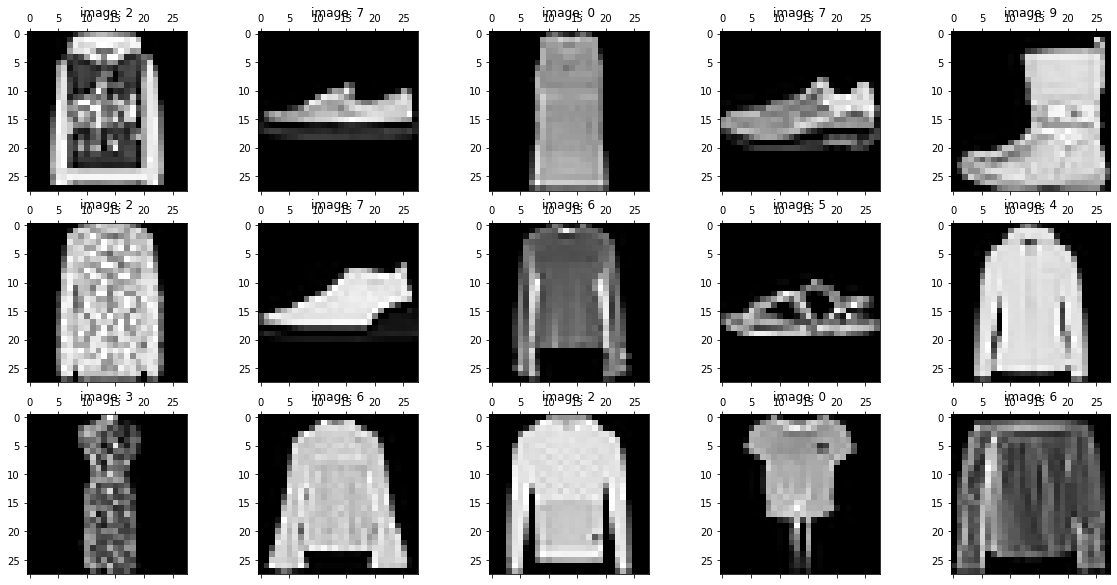

In [10]:
import matplotlib.pyplot as plt

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(20,10) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="image: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

#Vì dữ liệu có 784 chiều nên thay vì chạy bộ dữ liệu gốc với 70k giá trị ta chỉ chạy với bộ dữ liệu con 10k giá trị

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

N = 10000
df_sub = df.loc[rndperm[:N],:].copy()
data = df_sub[feat_cols].values

#5.1 Ứng dụng t-sne cho dữ liệu con

In [14]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_sub)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.975s...
[t-SNE] Computed neighbors for 10000 samples in 158.633s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 382.117701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.899292
[t-SNE] KL divergence after 300 iterations: 2.548472


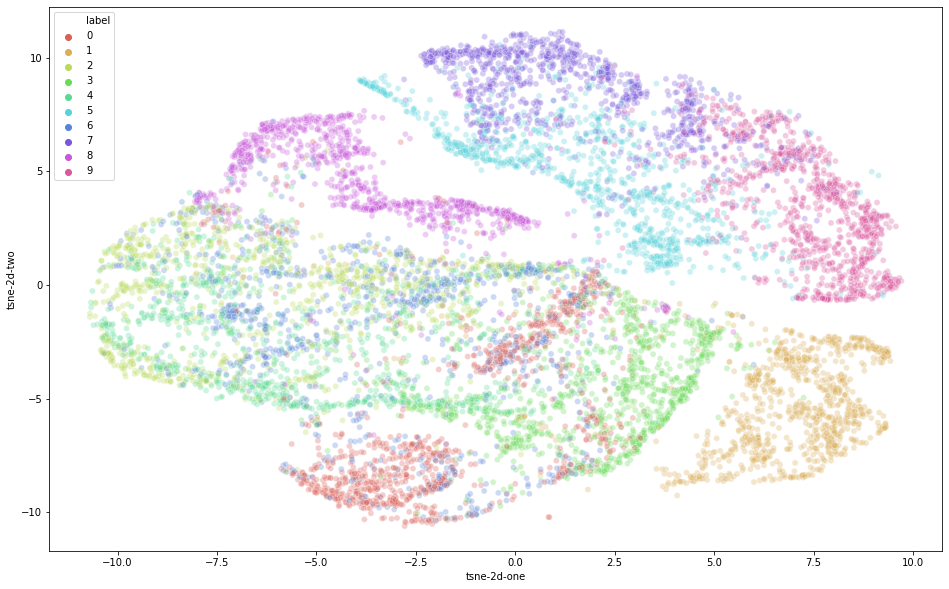

In [17]:
df_sub['tsne-2d-one'] = tsne_results[:,0]
df_sub['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_sub,
    legend="full",
    alpha=0.3
)

#5.2 Ứng dụng t-sne trên dữ liệu đã áp dụng PCA

#5.2.1. Trước khi ứng dụng t-sne ta áp dụng PCA cho dữ liệu thì ra kết quả

```
Cumulative explained variation for 50 principal components: 0.8641577600948476
```
Vì vậy với 50 thành phần chính PCA giải thích kết quả của bộ dữ liệu với 86.4%


In [18]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.86418395485966


In [23]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 31.20364546775818 seconds


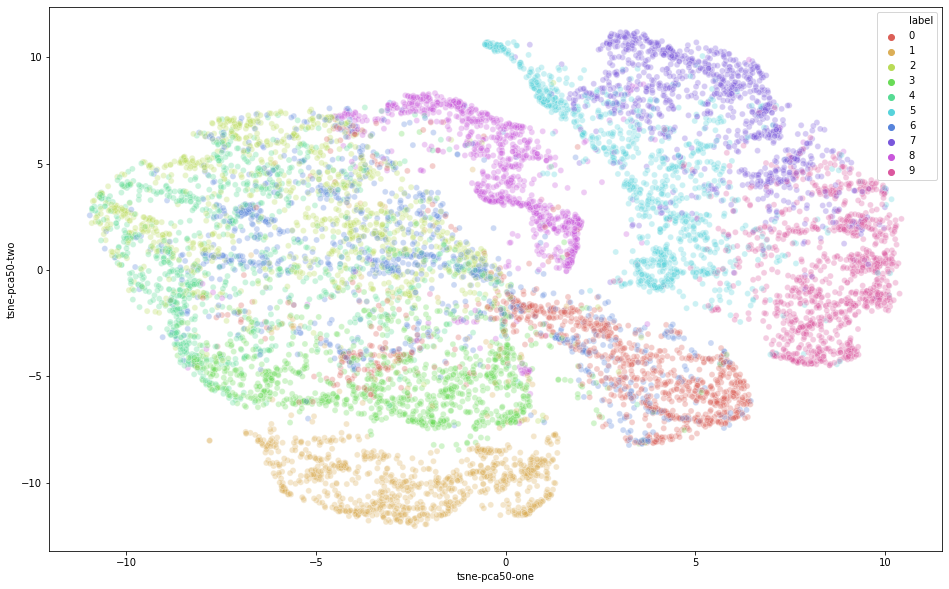

In [22]:
df_sub['tsne-pca50-one'] = tsne_pca_results[:,0]
df_sub['tsne-pca50-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_sub,
    legend="full",
    alpha=0.3,
)

#Nhận xét: Khi ứng dụng t-sne trên bộ dữ liệu gốc thì thời gian nhiều hơn khi ứng dụng t-sne trên bộ dữ liệu đã áp dụng thuật toán pca đồng thời kết quả khi visualize ta thấy có sự gom nhóm rõ ràng hơn